# Implementación y Evaluación de Filtros Digitales

Esta notebook tiene como objetivo diseñar e implementar filtros digitales pasa bajos, pasa altos y pasa bandas utilizando Python. Se analizará el comportamiento de señales ruidosas antes y después de ser filtradas utilizando distintos métodos de diseño de filtros (Butterworth, Chebyshev y FIR con ventana).


# Saúl Emmanuel De León Estrada

In [1]:
# Importamos las librerías necesarias para procesamiento de señales y visualización
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, cheby1, firwin, lfilter, freqz

# Configuramos el estilo de los gráficos
plt.style.use('seaborn-v0_8-darkgrid')


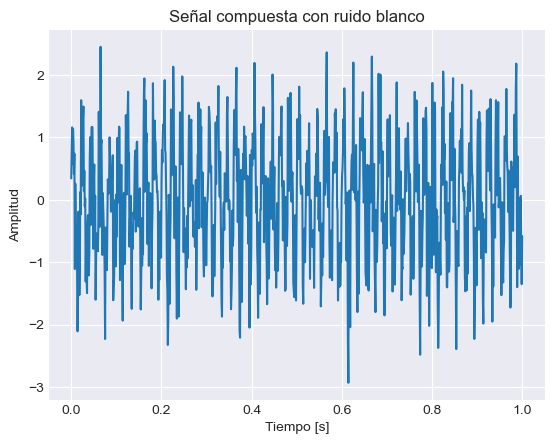

In [2]:
# Definimos parámetros básicos
fs = 1000  # Frecuencia de muestreo (Hz)
t = np.linspace(0, 1.0, fs)  # Vector de tiempo de 1 segundo

# Generamos una señal compuesta por dos senoidales de 50 Hz y 200 Hz
signal = np.sin(2*np.pi*50*t) + 0.5*np.sin(2*np.pi*200*t)

# Añadimos ruido blanco a la señal para simular interferencia
noisy_signal = signal + np.random.normal(0, 0.5, len(t))

# Mostramos la señal con ruido
plt.plot(t, noisy_signal)
plt.title("Señal compuesta con ruido blanco")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.show()


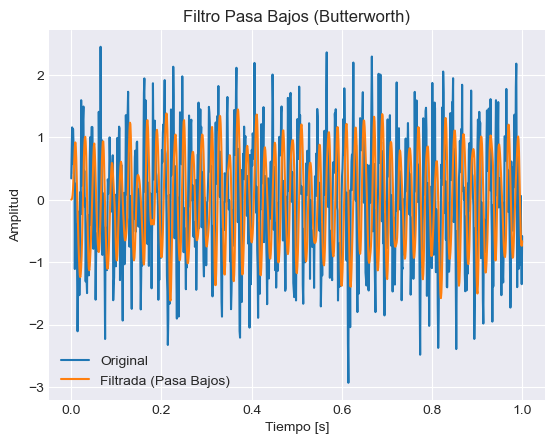

In [3]:
# Función para diseñar un filtro pasa bajos tipo Butterworth
def butter_lowpass(cutoff, fs, order=5):
    nyq = fs * 0.5  # Frecuencia de Nyquist
    normal_cutoff = cutoff / nyq  # Frecuencia normalizada
    b, a = butter(order, normal_cutoff, btype='low')  # Coeficientes del filtro
    return b, a

# Función para aplicar el filtro a una señal
def apply_filter(data, b, a):
    return lfilter(b, a, data)  # Filtrado de la señal

# Definimos frecuencia de corte y aplicamos el filtro
cutoff_lp = 100  # Frecuencia de corte (Hz)
b_lp, a_lp = butter_lowpass(cutoff_lp, fs)
filtered_lp = apply_filter(noisy_signal, b_lp, a_lp)

# Visualizamos la señal original vs filtrada
plt.plot(t, noisy_signal, label='Original')
plt.plot(t, filtered_lp, label='Filtrada (Pasa Bajos)')
plt.title("Filtro Pasa Bajos (Butterworth)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.legend()
plt.show()


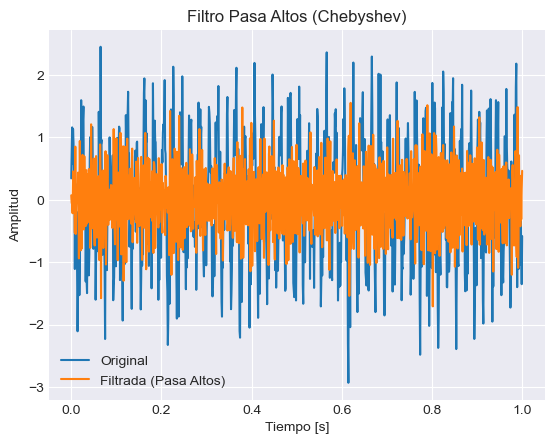

In [4]:
# Función para diseñar un filtro pasa altos tipo Chebyshev tipo I
def cheby_highpass(cutoff, fs, order=4, rp=1):
    nyq = fs * 0.5
    normal_cutoff = cutoff / nyq
    b, a = cheby1(order, rp, normal_cutoff, btype='high')  # Coeficientes del filtro
    return b, a

# Definimos frecuencia de corte y aplicamos el filtro
cutoff_hp = 150  # Frecuencia de corte (Hz)
b_hp, a_hp = cheby_highpass(cutoff_hp, fs)
filtered_hp = apply_filter(noisy_signal, b_hp, a_hp)

# Visualizamos la señal original vs filtrada
plt.plot(t, noisy_signal, label='Original')
plt.plot(t, filtered_hp, label='Filtrada (Pasa Altos)')
plt.title("Filtro Pasa Altos (Chebyshev)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.legend()
plt.show()


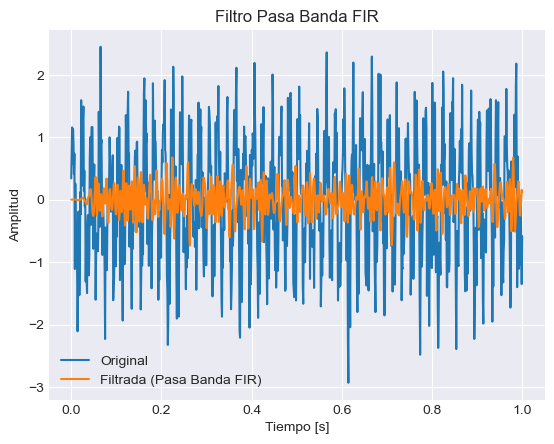

In [5]:
# Función para diseñar un filtro pasa banda FIR con ventana Hamming
def fir_bandpass(lowcut, highcut, fs, numtaps=101):
    nyq = fs * 0.5
    # Calculamos los coeficientes FIR para un filtro pasa banda
    taps = firwin(numtaps, [lowcut/nyq, highcut/nyq], pass_zero=False, window='hamming')
    return taps

# Definimos las frecuencias de corte inferior y superior
taps_bp = fir_bandpass(60, 180, fs)
filtered_bp = lfilter(taps_bp, 1.0, noisy_signal)  # Aplicamos filtro FIR

# Visualizamos la señal original vs filtrada
plt.plot(t, noisy_signal, label='Original')
plt.plot(t, filtered_bp, label='Filtrada (Pasa Banda FIR)')
plt.title("Filtro Pasa Banda FIR")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.legend()
plt.show()
